<a href="https://colab.research.google.com/github/pmvdafonseca/filter_fir_high_pass/blob/main/Projeto_FIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de um filtro FIR**

Estudo de filtros FIR passa-baixa através de um projeto com as seguintes características:

Fase: Linear

Banda de passagem: 0 - 4KHz

Ripple da banda de passagem: 0.1dB

Atenuação mínima da banda de passagem: 60 dB

Taxa de amostragem: 44.1kHz

In [ ]:
# Projeto de um filtro FIR passa baixa
import numpy as np
from scipy import signal
from scipy import special
import matplotlib.pyplot as plt
from IPython.display import Audio 

In [ ]:
fp = 4000         # frequência superior da banda de passagem
fr = 5000         # frequência inferior da banda de rejeição
fs = 44100        # frequência de amostragem
alphap = 0.1      # ripple admissível na banda de passagem em dB
alphar = 60       # atenuação mínima na banda de rejeição (ripple) em dB

Algumas transformações necessárias nas variáveis de entrada:


*   Transformações dos ripples em escala linear
$$\delta_p = 1 - 10^{-\frac{\alpha_p}{20}}$$
$$\delta_r = 10^{-\frac{\alpha_r}{20}}$$

*   Transformação das frequências em frequências normalizadas


$$\omega_p = 2\pi \frac{f_p}{f_s}$$
$$\omega_r = 2\pi \frac{f_r}{f_s}$$

In [ ]:
deltap = 1 - 10**(-alphap/20.0)  # ripple na banda de passagem (escala linear)
deltar = 10**(-alphar/20.0)      # atenuação mínima na banda de rejeição (escala linear)
omegap = 2*np.pi*fp/fs           # frequência superior da banda de passagem normalizada entre zero e pi
omegar = 2*np.pi*fr/fs           # frequência inferior da banda de rejeição normalizada entre zero e pi
print(deltar)
print(deltap)

0.001
0.011446905343061142


Estimativa de ordem segundo a Fórmula de Kaiser
$$N \approx \frac{-20 log_{10}(\sqrt{\delta_p \delta_s})-13}{14.6 \frac{\omega_s - \omega_p}{2\pi}}$$

In [ ]:
# Estimativa de ordem com a fórmula de Kaiser
Nkaiser = np.ceil((-20.0*np.log10(np.sqrt(deltap*deltar)) -13.0)/(14.6*(omegar - omegap)/(2.0*np.pi)))
print ('Estimativa com a fórmula de Kaiser: ' + str(Nkaiser))

Estimativa com a fórmula de Kaiser: 110.0


Estimativa de ordem segundo a Fórmula de Bellanger
$$N \approx -\frac{2 \log_{10} (10 \delta_p \delta_s)}{3 \frac{\omega_s - \omega_p}{2\pi}} -1$$

In [ ]:
# Estimativa de ordem com a fórmula de Bellanger
Nbellanger = np.ceil(-(2.0*np.log10(10.0*deltap*deltar))/(3.0*((omegar-omegap)/(2.0*np.pi))) -1.0)
print ('Estimativa com a fórmula de Bellanger: ' + str(Nbellanger))

Estimativa com a fórmula de Bellanger: 115.0


Estimativa de ordem segundo a Fórmula de Herrmann
$$N \approx \frac{D_\infty(\delta_p,\delta_s) - F(\delta_p,\delta_s)\left[\frac{\omega_p-\omega_s}{2\pi}\right]^2}{\frac{\omega_p-\omega_s}{2\pi}}$$
em que 
$$D_\infty (\delta_p,\delta_s)  = \left[ a_1(\log_{10}\delta_p)^2 + a_2(\log_{10}\delta_p) + a_3  \right] \log_{10} \delta_s - \left[ a_4(\log_{10}\delta_p)^2 + a_5(\log_{10}\delta_p) + a_6  \right]$$
$$F(\delta_p,\delta_s) = b_1 + b_2 (\log_{10}\delta_p - \log_{10}\delta_s)$$
e
$$a_1 = 0.005309$$ $$a_2 = 0.07114$$ $$a_3 = -0.4761$$ $$a_4 = 0.00266$$  $$a_5 = 0.5941$$ $$a_6 = 0.4278$$ $$b_1 = 11.01217$$ $$b_2 = 0.51244$$

In [ ]:
# Estimativa de ordem com a fórmula de Hermann

a1 = 0.005309
a2 = 0.07114
a3 = -0.4761
a4 = 0.00266
a5 = 0.5941
a6 = 0.4278
b1 = 11.01217
b2 = 0.51244

Dinf = (a1*(np.log10(deltap)**2.0) + a2*np.log10(deltap)+a3)*np.log10(deltar) -(a4*(np.log10(deltap)**2.0)+a5*np.log10(deltap) + a6)

F = b1 + b2*(np.log10(deltap) - np.log10(deltar))

Nherrmann = np.ceil((Dinf - F*(((omegap-omegar)/(2*np.pi))**2.0))/((omegar-omegap)/(2.0*np.pi)))
print ('Estimativa com a fórmula de Hermann: ' + str(Nherrmann))

Estimativa com a fórmula de Hermann: 110.0


Estimativa segundo a função kaiserord da biblioteca scipy.signal. A estimativa é realizada (acho) por meio da equação

$$N \approx \frac{-20\log_{10}(\min\{\delta_p,\delta_r\}) - 7.95}{ 2.285 \frac{ \omega_r - \omega_p }{2}} + 1$$

In [ ]:
# Estimativa de ordem supondo uma janela de Kaiser, utilizando a função pronta do scipy.signal
ripple = min(deltap,deltar)
Nkaiserwin, beta = signal.kaiserord(-20*np.log10(ripple),(omegar-omegap)/(2.0*np.pi))
print ('Estimativa para uma janela de Kaiser: ' + str(Nkaiserwin))

Estimativa para uma janela de Kaiser: 321


Especifica a resposta ao impulso de um filtro ideal passa-baixa com frequência de corte $\omega_c$
$$h_{\mathrm{ideal}}[n] = \frac{\omega_c}{\pi} \mathrm{sinc}\left[\frac{\omega_c}{\pi} \left(n-\frac{N-1}{2}\right)\right], \quad n=0,1,\ldots,N-1$$
em que $$\mathrm{sinc}(x) = \frac{\sin(\pi x)}{\pi x}$$

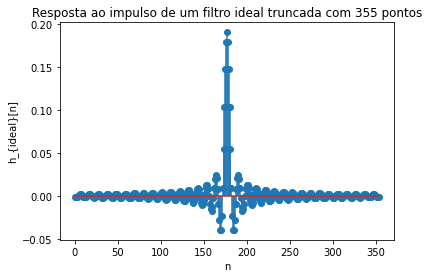

In [ ]:
# Especifiquei um comprimento de filtro FIR a partir das estimativas anteriores mas não necessariamente usando elas
N = 355
n = np.arange(0,N,1)
#fc = (fp+fr)/(2.0*fs)
fc = 1.05*fp/fs
hideal = 2.0*fc*special.sinc((n-(N-1)/2.0)*2.0*fc)

plt.title('Resposta ao impulso de um filtro ideal truncada com '+str(N)+' pontos')
plt.xlabel('n')
plt.ylabel('h_{ideal}[n]')
plt.stem(n,hideal,use_line_collection=True)
plt.show()

Utiliza uma janela de Hamming
$$w[n] = 0.54 + 0.46\cos\left(\frac{2\pi \left(n - \frac{N-1}{2}\right)}{N}\right), \quad n=0,1,2,\ldots,N-1$$
multiplicada à resposta do filtro ideal para produzir o protótipo do filtro $h[n]$

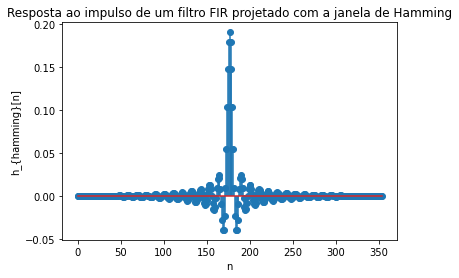

In [ ]:
hwin = signal.windows.hamming(N)
hhamming = hwin*hideal
plt.title('Resposta ao impulso de um filtro FIR projetado com a janela de Hamming')
plt.xlabel('n')
plt.ylabel('h_{hamming}[n]')
plt.stem(n,hhamming,use_line_collection=True)
plt.show()

(0.0, 3.141592653589793, -80.0, 6.0)

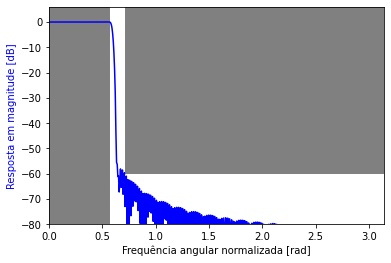

In [ ]:
w,respfreq = signal.freqz(hhamming,1)
plt.plot(w, 20 * np.log10(abs(respfreq)), 'b')
plt.ylabel('Resposta em magnitude [dB]', color='b')
plt.xlabel('Frequência angular normalizada [rad]')
plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.5', lw=0) 
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.5', lw=0) 
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.5', lw=0) 
plt.axis([0, np.pi, -80, 6])

Repetindo o processo com uma janela de Kaiser

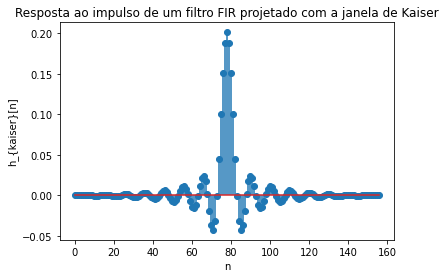

In [ ]:
N = 157
n = np.arange(0,N,1)
fc = 1.11*fp/fs
hideal = 2.0*fc*special.sinc((n-(N-1)/2.0)*2.0*fc)

hwin = signal.windows.kaiser(N,beta)
hkaiser = hwin*hideal
plt.title('Resposta ao impulso de um filtro FIR projetado com a janela de Kaiser')
plt.xlabel('n')
plt.ylabel('h_{kaiser}[n]')
plt.stem(n,hkaiser,use_line_collection=True)
plt.show()

(0.0, 3.141592653589793, -80.0, 6.0)

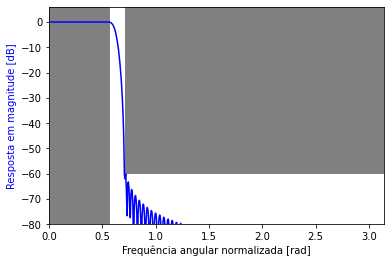

In [ ]:
w,respfreq = signal.freqz(hkaiser,1)
plt.plot(w, 20 * np.log10(abs(respfreq)), 'b')
plt.ylabel('Resposta em magnitude [dB]', color='b')
plt.xlabel('Frequência angular normalizada [rad]')
plt.fill([0, omegap,  omegap,  0], [-alphap, -alphap, -600, -600], '0.5', lw=0)
plt.fill([0, omegap,  omegap,  0], [alphap, alphap, 600, 600], '0.5', lw=0) 
plt.fill([omegar, omegar, np.pi, np.pi], [99,  -alphar,  -alphar, 99], '0.5', lw=0) 
plt.axis([0, np.pi, -80, 6])

Cria um sinal de entrada $$x[n] = \sin(2\pi \frac{440}{44100} n) + \sin(2\pi \frac{6000}{44100} n)$$ (uma senóide de 440 Hz na banda de passagem e uma senóide de 6000 Hz na banda de rejeição) para o teste do filtro

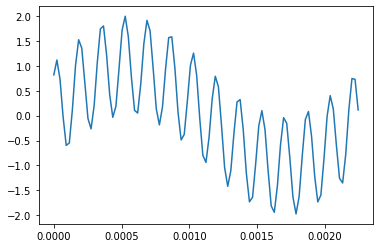

In [ ]:
n = np.arange(0,2,1.0/fs)
x = np.sin(2*np.pi*440*n) + np.sin(2*np.pi*6000*n)
plt.plot(np.linspace(0, (99)/fs, num=99), x[1:100])
Audio(x,rate=fs)

Filtra o sinal com o filtro FIR projetado com a janela de Hamming

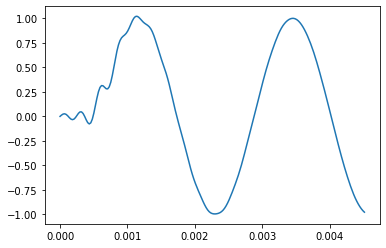

In [ ]:
yhamming = signal.lfilter(hhamming,1,x)
plt.plot(np.linspace(0, (199)/fs, num=199), yhamming[151:350])
Audio(yhamming,rate=fs)

Filtra o sinal com o filtro FIR projetado com a janela de Kaiser

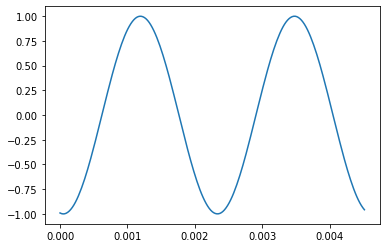

In [ ]:
ykaiser = signal.lfilter(hkaiser,1,x)
plt.plot(np.linspace(0, (199)/fs, num=199), ykaiser[151:350])
Audio(ykaiser,rate=fs)